### This mini analysis leverages text data comprised of all campaign speeches by then presidential candidate Donald Trump. The analysis leverages several popular text assessment tools including regular expressions, NLTK and TextBlob. 

In [67]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import re
import string
import difflib
from collections import Counter
from nltk.tokenize import sent_tokenize
from textblob import TextBlob
import warnings
import sys  
reload(sys)  
sys.setdefaultencoding('utf8')

In [2]:
warnings.filterwarnings("ignore", category=DeprecationWarning, module="pandas", lineno=570)

#### Regex is used to locate "influencer" words, or words 5-15 characters in length; a clean, potential alternative from stopwords 

In [3]:
match_pattern = re.findall(r'\b[a-z]{5,15}\b', open('full_speech.txt').read().lower())

In [4]:
match_count = Counter(match_pattern).most_common(5)

In [5]:
match_count

[('going', 1012),
 ('people', 784),
 ('clinton', 780),
 ('country', 745),
 ('american', 721)]

#### A barchart above the regex results

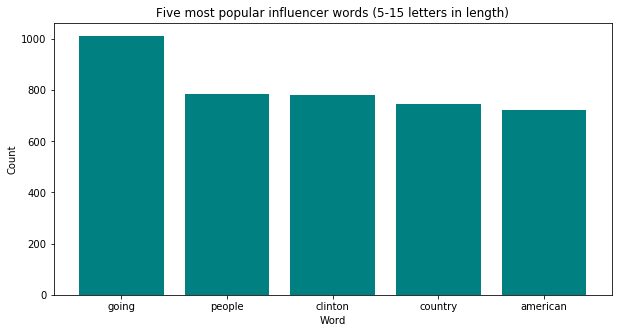

In [55]:
# sort in-place from highest to lowest
match_count.sort(key=lambda x: x[1], reverse=True) 

# save the names and their respective scores separately
# reverse the tuples to go from most frequent to least frequent 
people = zip(*match_count)[0]
score = zip(*match_count)[1]
x_pos = np.arange(len(people)) 

plt.bar(x_pos, score, align='center', color='teal')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.xticks(x_pos, people) 
plt.title("Five most popular influencer words (5-15 letters in length)")
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

#### NLK tokenization and TextBlob to prepare and analyze speech text for sentimentality

In [8]:
trump_text = open("full_speech.txt").read().lower()
trump_sentences = sent_tokenize(trump_text)
trump_sent_clean = [x for x in trump_sentences if not any(c.isdigit() for c in x)]

In [9]:
testimonial = TextBlob(trump_text)

In [10]:
testimonial.sentiment

Sentiment(polarity=0.10132044464249944, subjectivity=0.45658018743425466)

#### Top five most common noun phrases using TextBlob; first person past and present tences, applause, 'can't', and 'hillary clinton'

In [81]:
# ...
Counter(testimonial.noun_phrases).most_common(5)

[(u'hillary clinton', 249),
 (u"i 'm", 187),
 (u'[ applause ]', 126),
 (u"i 've", 71),
 (u"ca n't", 57)]

#### Use of difflib's get_close_matches function to assess contextual relevancies of 'hot button issues' within speech text.

In [15]:
terror_match = difflib.get_close_matches('islamic terrorism', trump_sent_clean, n = 15, cutoff = 0.2)
terror_match

['radical islamic terrorism.',
 "it's failed them on crime.",
 'i saw this.',
 'i like them.',
 'she was terrible.',
 '"i like them.',
 'i said, "keep the oil.',
 'israel does not name public squares after terrorists.',
 'and the world is a mess.',
 "i said that's right.",
 'that is what we must have to defeat radical islamic terrorism.',
 'it was really an amazing interview.',
 "it's so preposterous.",
 "i said they don't need it.",
 'much better.']

In [16]:
wall_match = difflib.get_close_matches('built that wall', trump_sent_clean, n = 15, cutoff = 0.2)
wall_match

['but that will change.',
 'but actually i am.',
 'no, not at all.',
 'they built a hotel.',
 "isn't that nice?",
 'and that was it.',
 'do i know how to build a wall?',
 'but it was such a lie.',
 'and that was horrible.',
 'we wish them well.',
 'thank you all.',
 "it's the power to heal.",
 "that's really nice.",
 'thank you, all.',
 "it's a scandal."]

In [17]:
clinton_match = difflib.get_close_matches('crooked hillary', trump_sent_clean, n = 15, cutoff = 0.2)
clinton_match

["she's crooked hillary.",
 'and they will pay.',
 "we're going to make history.",
 'incredible.',
 'incredible.',
 'really.',
 "look, hillary clinton's a disaster.",
 'look, hillary clinton is a disaster.',
 'take the oil.',
 'keep the oil.',
 'keep the oil.',
 'i like china.',
 'look at my family.',
 'we all agreed.',
 'they will pay.']